In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import datasets
from sklearn import metrics


%matplotlib inline

## load dataset

In [5]:
tips = sb.load_dataset("tips")

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

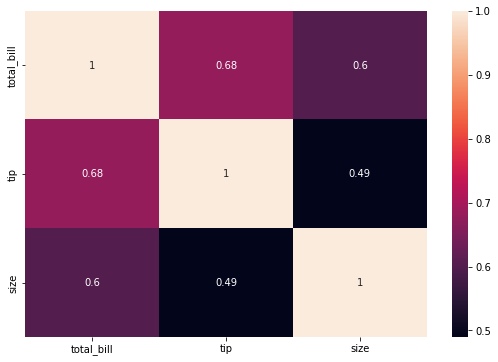

In [19]:
correlation_matrix = tips.corr().round(2)

plt.figure(figsize=(9,6))

sb.heatmap(data=correlation_matrix, annot = True)

<AxesSubplot:>

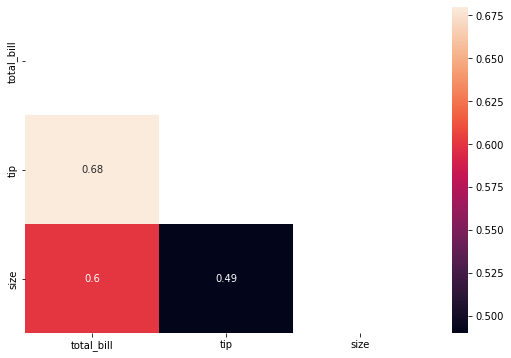

In [46]:
mask = np.zeros_like(correlation_matrix)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True, mask=mask)

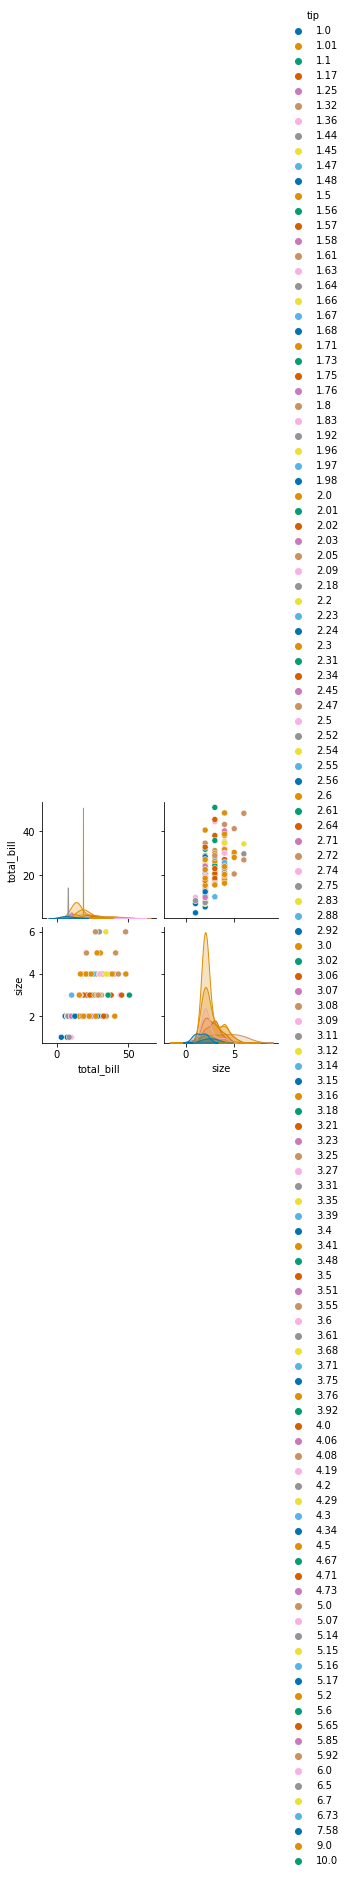

In [27]:
sb.pairplot(tips, hue="tip", height = 2, palette = 'colorblind')

In [39]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
tips.replace(0, np.nan, inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [41]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [47]:
X = tips[["total_bill","size"]]

X

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [48]:
y = tips["tip"]
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

## data splitting

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=16)

In [51]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (170, 2)
X_test shape:  (74, 2)
y_train shape:  (170,)
y_test shape:  (74,)


In [52]:
from sklearn.linear_model import LinearRegression


linealRegModel = LinearRegression()

linealRegModel.fit(X_train,y_train)


LinearRegression()

In [57]:
y_predicted_LRM = linealRegModel.predict(X_test)

In [58]:
y_predicted_LRM

array([3.57120315, 1.79865444, 2.9107341 , 2.92539083, 2.0514831 ,
       3.03978685, 2.69454728, 1.89025903, 2.25209714, 2.6670659 ,
       5.83555876, 3.69842381, 3.02707192, 3.60967708, 4.12398196,
       4.59706478, 1.89117507, 2.49026906, 2.4371384 , 2.92212981,
       4.89019945, 3.76448882, 2.05331519, 5.33030462, 3.87064043,
       2.03316218, 3.60051662, 2.27041805, 3.1644788 , 5.35738283,
       4.10434183, 2.82319686, 3.15114127, 2.37576333, 3.27990057,
       2.46461977, 2.17423324, 2.30156361, 3.53078742, 2.84060173,
       2.78340373, 3.19562435, 2.96386476, 3.37557251, 3.30360805,
       2.27957851, 3.01241519, 2.30156361, 2.31622035, 3.33394728,
       4.02831003, 2.249349  , 3.87481749, 1.62603466, 2.32629685,
       2.78615186, 4.63828684, 4.74689313, 2.83103811, 1.9855278 ,
       2.74309771, 1.80323467, 3.30463381, 2.20669801, 4.29150864,
       2.69678254, 5.08806535, 3.42646791, 4.37629773, 2.7110361 ,
       2.73943353, 2.51775043, 3.89995389, 4.28297077])

In [59]:
score_LRM = linealRegModel.score(X_test,y_test)

In [60]:
score_LRM

0.5805402397640953

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted_LRM)))

In [63]:
rmse

0.9075568789904043

In [64]:
# print the both values
print('-------------------------------------------')
print('r-squared: {}'.format(score_LRM))
print('-------------------------------------------')
print('root mean squared error: {}'.format(rmse))
print('-------------------------------------------')

-------------------------------------------
r-squared: 0.5805402397640953
-------------------------------------------
root mean squared error: 0.9075568789904043
-------------------------------------------


Text(0.5, 1.0, 'Predicted Tips vs. Actual Tips ')

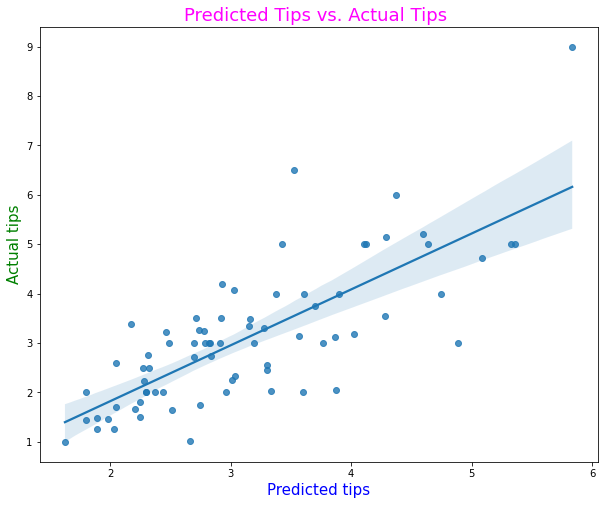

In [66]:
plt.figure(figsize=(10,8))
sb.regplot(x=y_predicted_LRM, y=y_test)
plt.xlabel('Predicted tips', fontsize=15, color='blue')
plt.ylabel('Actual tips', fontsize=15, color='green')
plt.title("Predicted Tips vs. Actual Tips ", fontsize=18, color='magenta')